In [2]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import colour
import os


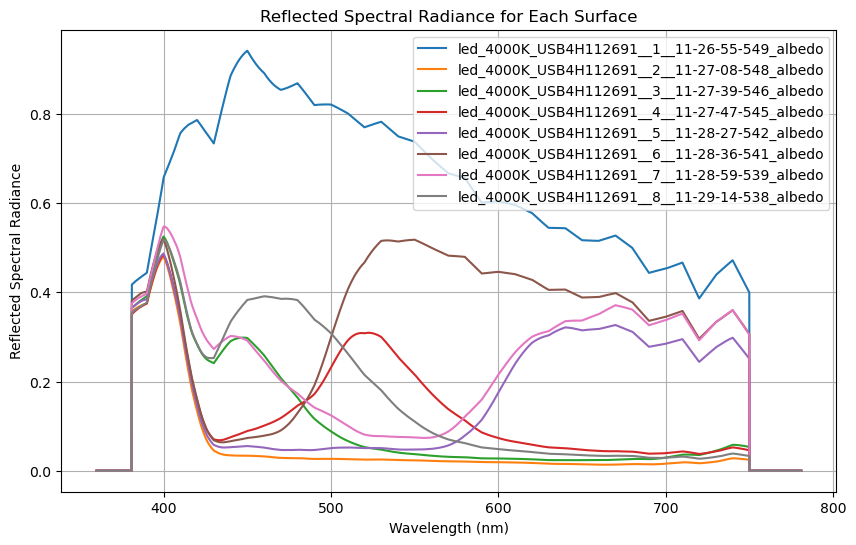

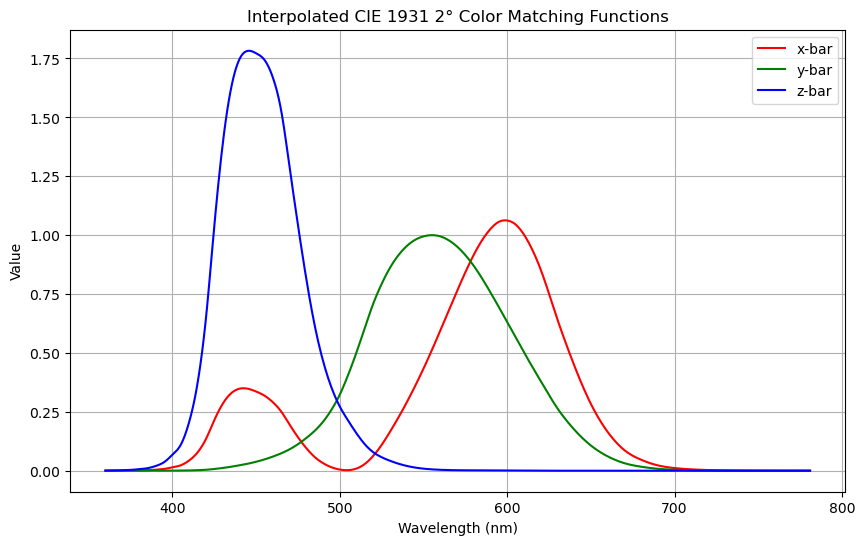

In [10]:

# Folder paths
albedo_folder = "C:/Users/brahim/OneDrive - Institut Optique Graduate School/projet apparence spectrale/mesure_projet_blender/fiber/output/albedo"

# D65 illuminant
light_source_wavelengths = np.arange(360, 781, 0.05)
d65_illuminant = colour.SDS_ILLUMINANTS["D65"]
light_source_values = np.interp(light_source_wavelengths, d65_illuminant.wavelengths, d65_illuminant.values)
light_source_values_normalized = light_source_values / np.max(light_source_values)

# Load albedo files
albedo_files = [os.path.join(albedo_folder, f) for f in os.listdir(albedo_folder) if f.endswith('.csv')]

# Prepare data for plotting
plt.figure(figsize=(10, 6))
for albedo_file in albedo_files:
    albedo_data = pd.read_csv(albedo_file)
    albedo_wavelengths = albedo_data.iloc[:, 0].values
    albedo_values = albedo_data.iloc[:, 2].values
    
    # Interpolate albedo
    interp_albedo = interp1d(albedo_wavelengths, albedo_values, kind='linear', bounds_error=False, fill_value=0)
    albedo_interpolated = interp_albedo(light_source_wavelengths)

    # Reflected radiance
    radiance = albedo_interpolated * light_source_values_normalized
    plt.plot(light_source_wavelengths, radiance, label=os.path.splitext(os.path.basename(albedo_file))[0])

# Plot reflected spectral radiance
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflected Spectral Radiance')
plt.title('Reflected Spectral Radiance for Each Surface')
plt.legend()
plt.grid()
plt.show()

# CIE 1931 2° Standard Observer
cmfs = colour.MSDS_CMFS["CIE 1931 2 Degree Standard Observer"]
x_bar = np.interp(light_source_wavelengths, cmfs.wavelengths, cmfs.values[:, 0])
y_bar = np.interp(light_source_wavelengths, cmfs.wavelengths, cmfs.values[:, 1])
z_bar = np.interp(light_source_wavelengths, cmfs.wavelengths, cmfs.values[:, 2])

# Plot color matching functions
plt.figure(figsize=(10, 6))
plt.plot(light_source_wavelengths, x_bar, label='x-bar', color='r')
plt.plot(light_source_wavelengths, y_bar, label='y-bar', color='g')
plt.plot(light_source_wavelengths, z_bar, label='z-bar', color='b')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Value')
plt.title('Interpolated CIE 1931 2° Color Matching Functions')
plt.legend()
plt.grid()
plt.show()


In [3]:
def normalize_rgb(rgb):
    r, g, b = map(lambda x: max(x, 0), rgb)
    total = r + g + b
    return (r / total, g / total, b / total) if total else (0, 0, 0)
# Conversion matrix from XYZ to linear RGB (sRGB)

array([ 76.0712668 ,  83.95581938,  94.74678734])

(0.29858346833792271, 0.32953072550847562, 0.37188580615360167)

array([ 2.6625158 ,  2.3328353 ,  5.72897358])

(0.24826885410446964, 0.21752747824947652, 0.53420366764605376)

array([  3.49685364,   3.52756873,  30.13675595])

(0.094099643681412298, 0.094926180811366542, 0.81097417550722106)

array([  1.54443259,  27.04906926,  11.51677169])

(0.038504663532780599, 0.67436760895332848, 0.28712772751389098)

array([ 37.34799464,   4.58304731,   7.01706925])

(0.76301196760280032, 0.093630728526750931, 0.14335730387044879)

array([ 62.31534673,  55.72362688,   6.13208142])

(0.50185082758023025, 0.44876502711145216, 0.04938414530831757)

array([ 41.75348616,   7.31956139,  30.28902129])

(0.52611388246712298, 0.092229972008872049, 0.38165614552400506)

array([ -1.31883513,  16.99478667,  41.28399386])

(0.0, 0.29161191280453286, 0.70838808719546709)

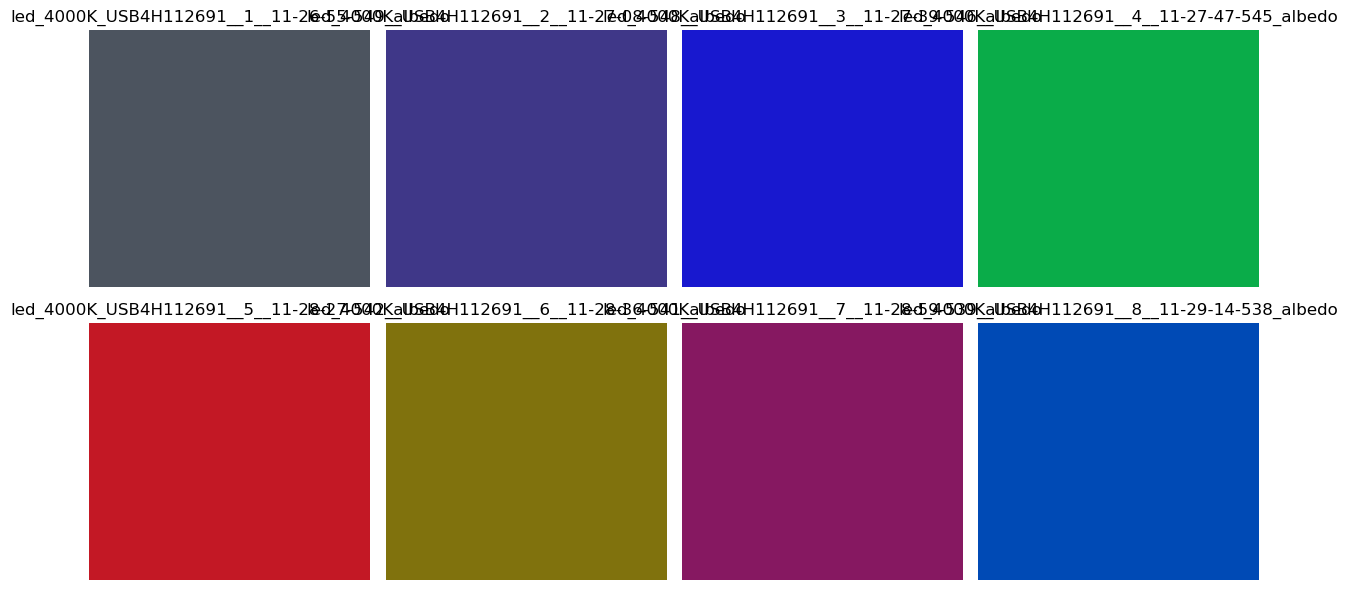

In [14]:

# Tristimulus values and RGB conversion
k = 100 / np.sum(light_source_values_normalized * y_bar)
XYZ_to_sRGB = np.array([
    [3.2406, -1.5372, -0.4986],
    [-0.9689, 1.8758, 0.0415],
    [0.0557, -0.2040, 1.0570]
])

surface_names = []
rgb_colors = []

for albedo_file in albedo_files:
    albedo_data = pd.read_csv(albedo_file)
    albedo_wavelengths = albedo_data.iloc[:, 0].values
    albedo_values = albedo_data.iloc[:, 2].values
    interp_albedo = interp1d(albedo_wavelengths, albedo_values, kind='linear', bounds_error=False, fill_value=0)
    albedo_interpolated = interp_albedo(light_source_wavelengths)

    # Reflected radiance
    radiance = albedo_interpolated * light_source_values_normalized

    # Tristimulus values
    X = k * np.sum(radiance * x_bar)
    Y = k * np.sum(radiance * y_bar)
    Z = k * np.sum(radiance * z_bar)

    # Convert to linear RGB
    RGB_linear = np.dot(XYZ_to_sRGB, np.array([X, Y, Z]))
    display(RGB_linear)
    RGB = normalize_rgb(RGB_linear)
    display(RGB)

    
    rgb_colors.append(RGB)
    surface_names.append(os.path.splitext(os.path.basename(albedo_file))[0])

# Display RGB colors
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = ax.flatten()

for i, (RGB, name) in enumerate(zip(rgb_colors, surface_names)):
    ax[i].add_patch(plt.Rectangle((0, 0), 1, 1, color=RGB))
    ax[i].set_title(name)
    ax[i].axis('off')

plt.tight_layout()
plt.show()
